In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data/df_preprocessed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143236 entries, 0 to 143235
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area                  143236 non-null  object 
 1   Crop                  143236 non-null  object 
 2   Year                  143236 non-null  int64  
 3   area_harvested_ha     143236 non-null  float64
 4   production_tonnes     143236 non-null  float64
 5   yield_hg/ha           143236 non-null  float64
 6   avg_rainfall_mm_year  143236 non-null  float64
 7   avg_temp_ºC           143236 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 8.7+ MB


In [4]:
# encode the object type variables to analize the correlation

from sklearn.preprocessing import LabelEncoder

# create an instance of the encoder
encoder = LabelEncoder()

for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = encoder.fit_transform(df[columns])

In [5]:
df

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
0,0,49,1990,1570000.0,1650000.00,10510.0,327.00,14.38
1,0,49,1991,1690000.0,1726000.00,10213.0,327.00,14.38
2,0,49,1992,1600000.0,1650000.00,10313.0,327.00,14.38
3,0,49,1993,1900000.0,1940000.00,10211.0,327.00,14.38
4,0,49,1994,2000000.0,2050000.00,10250.0,327.00,14.38
...,...,...,...,...,...,...,...,...
143231,161,47,2018,136412.0,239906.00,17587.0,658.94,21.85
143232,161,47,2019,97138.0,184584.00,19002.0,658.94,21.85
143233,161,47,2020,104759.0,203488.00,19424.0,658.94,21.85
143234,161,47,2021,99029.0,162370.00,16396.0,658.94,21.85


In [6]:
# Spearman's method 
corr = df.corr(method='spearman')

In [7]:
# Análisis de las variables altamente correlacionadas con yield (var objetivo)

threshold = 0.1
corr[(corr>threshold)|(corr<-threshold)]

,Area,Crop,Year,area_harvested_ha,production_tonnes,yield_hg/ha,avg_rainfall_mm_year,avg_temp_ºC
Area,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
area_harvested_ha,NaN,NaN,NaN,1.000000,0.882332,-0.201590,NaN,NaN
production_tonnes,NaN,NaN,NaN,0.882332,1.000000,0.227443,NaN,-0.155441
yield_hg/ha,NaN,NaN,NaN,-0.201590,0.227443,1.000000,NaN,-0.118798
avg_rainfall_mm_year,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.251123
avg_temp_ºC,NaN,NaN,NaN,NaN,-0.155441,-0.118798,0.251123,1.000000


In [8]:
#creamos un df con las variables que tienen una correlacion alta con la variable objetivo (price). También he metido el barrio porque quiero entrenar al modelo con esa variable
df_filtrado = df[['area_harvested_ha','production_tonnes',
		 'avg_temp_ºC',
		 'yield_hg/ha']]

In [9]:
#Guardar df limpio en csv
df_filtrado.to_csv('Data/df_ml.csv', index=False)

### Modelado de regresión y evaluación del modelo

- División de datos

In [10]:
df_filtrado

,area_harvested_ha,production_tonnes,avg_temp_ºC,yield_hg/ha
0,1570000.0,1650000.00,14.38,10510.0
1,1690000.0,1726000.00,14.38,10213.0
2,1600000.0,1650000.00,14.38,10313.0
3,1900000.0,1940000.00,14.38,10211.0
4,2000000.0,2050000.00,14.38,10250.0
...,...,...,...,...
143231,136412.0,239906.00,21.85,17587.0
143232,97138.0,184584.00,21.85,19002.0
143233,104759.0,203488.00,21.85,19424.0
143234,99029.0,162370.00,21.85,16396.0


In [11]:
# Asignamos las variables independientes y la variable dependiente. Nuestra variable objetivo es la edad
X = df_filtrado.drop(['yield_hg/ha'], axis=1)
y = df_filtrado['yield_hg/ha']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=357) 

In [14]:
# Normalización 
from sklearn.preprocessing import StandardScaler

#Inicializamos el escalador genérico
scaler = StandardScaler()
 
#Normalizamos las variables de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
 
#Aplicamos la misma normalización al conjunto de prueba (test)
X_test_scaled = scaler.transform(X_test)

In [15]:
#vamos el scaler para usarlo en el futuro
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Entrenamos los modelos:

- ElasticNet

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as mse
#Inicializamos modelo y parámetros
alpha = 0.1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = 0.1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse_ElasticNet = mse(y_test, y_pred) # calculamos el error cuadrático medio
mse_ElasticNet**.5

307935.6242704902

- Stochastic Gradient Descent

In [20]:
from sklearn.linear_model import SGDRegressor
#Inicializamos modelo y parámetros
penalty = 'elasticnet' #Elegimos entre penalización 'l2', 'l1' o 'elasticnet'
alpha = .1 #Parámetro que mide el peso que tienen los regularizadores frente a la función original
l1_ratio = .1 #Parámetro que mide el tradeoff entre el peso l1 y el l2
#Instanciamos el modelo
model = SGDRegressor(penalty = penalty, alpha = alpha, l1_ratio = l1_ratio, max_iter = 100, random_state = 0)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train_scaled, y_train)
mse_SGDRegressor = mse(y_test,model.predict(X_test_scaled))
print(mse_SGDRegressor**.5)

307986.4481086191


- Support Vector Regression

In [17]:
# from sklearn import svm
# #Inicializamos modelo y parámetros
# C = 1 #Parámetro regularizador
# kernel = 'rbf' #Núcleo transformador
# #Instanciamos el modelo
# model = svm.SVR(C = C, kernel = kernel)
# #Entrenamos modelo y elaboramos predicciones
# model.fit(X_train_scaled, y_train)
# mse_SVR = mse(y_test,model.predict(X_test_scaled))
# print(mse_SVR**0.5)

- Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
#Inicializamos modelo y parámetros
n_estimators = 200 #Estimadores del modelo
criterion = 'squared_error' #Forma de calcular el error
max_depth = None #Límite de profundidad de los árboles
min_samples_split = 2 #Criterio de parada de profundidad
verbose = 1 #Información devuelta por el método
#Instanciamos el modelo
model = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, verbose=verbose)
#Entrenamos modelo y elaboramos predicciones
model.fit(X_train_scaled, y_train)
mse_RF = mse(y_test,model.predict(X_test_scaled))
print(mse_RF**.5)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  5.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s


25742.989440362824


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.1s


- Boosting: *Gradient Descent*

In [18]:
import xgboost as xgb
#Inicializamos modelo y parámetros
params = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:squarederror", "nthread":2}
num_boost_round = 10
#Convertimos los datos a formato DMatrix
train_data = xgb.DMatrix(X_train_scaled, label=y_train)
test_data = xgb.DMatrix(X_test_scaled, label=y_test)
#Instanciamos el modelo, entrenamos y elaboramos predicciones
model = xgb.train(params = params, dtrain = train_data, num_boost_round=num_boost_round)
mse_XGB = mse(y_test,model.predict(test_data))
print(mse_XGB**0.5)

230787.28294873453


Comparamos los modelos:

Text(0.5, 0, 'Modelo')

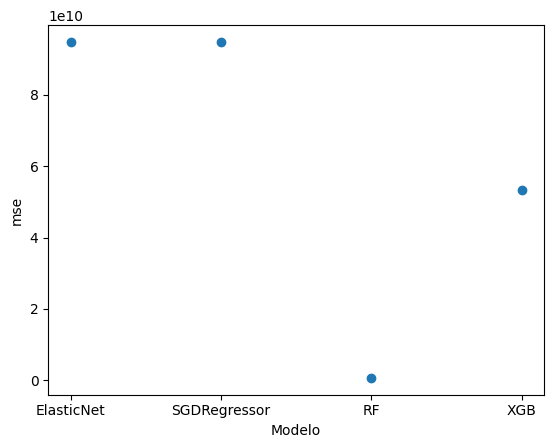

In [21]:
mse = [mse_ElasticNet, mse_SGDRegressor, mse_RF, mse_XGB] # mse_SVR
plt.scatter(['ElasticNet', 'SGDRegressor', 'RF', 'XGB'], mse) # SVR
plt.ylabel('mse')
plt.xlabel('Modelo')

Best Model: Random Forest

In [22]:
#vamos a guardar nuestro mejor modelo para usarlo en el futuro
import joblib
joblib.dump(model, 'models/yield_RF.pkl') 

['models/yield_RF.pkl']

---
### Fast Machine Learning (Pycaret)

In [1]:
from pycaret.regression import *

In [5]:
df = pd.read_csv('Data/df_ml.csv')

In [6]:
#Hacemos un setup del data diciendole que la target age es mi objetivo
setup = setup(data = df, target = 'yield_hg/ha', session_id = 357)	

,Description,Value
0,Session id,357
1,Target,yield_hg/ha
2,Target type,Regression
3,Original data shape,"(143236, 4)"
4,Transformed data shape,"(143236, 4)"
5,Transformed train set shape,"(100265, 4)"
6,Transformed test set shape,"(42971, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [26]:
# Comparamos modelos y elegimos el que mejor de 
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3587.9656,551087628.0609,22972.4220,0.9940,0.0927,0.0534,40.7160
rf,Random Forest Regressor,2977.6208,714065649.0696,25650.0471,0.9922,0.0719,0.0625,31.5980
xgboost,Extreme Gradient Boosting,9994.5439,1257521315.2000,34140.1443,0.9859,0.2789,0.2835,0.5540
dt,Decision Tree Regressor,5441.2855,1372350959.0094,35995.9830,0.9848,0.0745,0.0341,0.4760
lightgbm,Light Gradient Boosting Machine,11130.7669,1733388028.7206,40786.9464,0.9810,0.2851,0.2854,0.6410
gbr,Gradient Boosting Regressor,26642.0504,5004817391.0190,70306.0941,0.9442,0.5729,0.6909,8.1730
knn,K Neighbors Regressor,16107.1401,20706975129.6000,142650.6422,0.7708,0.1021,0.0369,0.1630
llar,Lasso Least Angle Regression,125156.0719,87068599910.4000,294384.0250,0.0241,1.5135,4.9326,0.0630
lar,Least Angle Regression,125156.0805,87068599910.4000,294384.0266,0.0241,1.5135,4.9326,0.0600
en,Elastic Net,125138.7250,87068676915.2000,294383.9047,0.0241,1.5136,4.9353,0.3040


In [27]:
#nos quedamos con Extra Trees Regressor. Creamos variable con el modelo elegido
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3614.7493,600481172.2876,24504.7173,0.9941,0.0868,0.0321
1,3758.4647,783103961.5283,27983.9947,0.9925,0.0910,0.0320
2,3336.6149,567265181.0088,23817.3294,0.9939,0.0822,0.0305
3,3318.2125,465711087.5900,21580.3403,0.9947,0.0872,0.0315
4,3660.4308,673902344.7499,25959.6291,0.9926,0.1229,0.2370
5,3556.0046,367305413.0275,19165.2136,0.9951,0.0966,0.0347
6,4039.5940,564945235.6064,23768.5766,0.9945,0.0916,0.0346
7,3958.7096,937730884.1123,30622.3919,0.9896,0.0968,0.0352
8,3068.4907,154117228.7294,12414.3960,0.9977,0.0952,0.0360


In [28]:
#mejoramos sus hiperparametros de forma automática y vemos como baja considerablemente el MSE
tuned_et = tune_model(et)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:19:16
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
#vemos la importancia de las variables
plot_model(tuned_et, plot = 'feature')

In [ ]:
#vemos sus residuos
plot_model(tuned_et, plot = 'residuals')

In [ ]:
#finalizamos el modelo con los hiperparámetros
final_et = finalize_model(tuned_et)

In [ ]:
#guardamos el modelo
save_model(final_et, 'models/pycaret_ET')